# D598 Task 3 Shareholder Data Report

#### The program below fulfills all logical requirements and will be invaluable for data analysis and company growth.

The code begins with setting our environment and cleaning our column titles to allow for a higher degree of efficiency when performing future analysis. Additionally, I define a function that will allow me to format the included visualizations for added readability.

In [17]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

#imports data to data set and reformats column titles for improved readability
df = pd.read_excel("D598_Data_set.xlsx")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df = df.rename(columns={"total_long-term_debt" : "total_long_term_debt"})

#functions for this program
def human_format(x, pos):
    #Formats numbers as K, M, B depending on size.
    if abs(x) >= 1e9:
        return f"{x*1e-9:.1f}B"
    elif abs(x) >= 1e6:
        return f"{x*1e-6:.1f}M"
    elif abs(x) >= 1e3:
        return f"{x*1e-3:.1f}K"
    else:
        return f"{x:.0f}"
    
def safe_divide(a, b):
    #utilized during calculation to ensure division by zero does not occur
    #result = np.nan_to_num(np.divide(a, b), nan=0, where=b!=0)
    result = np.divide(a, b, out=np.zeros_like(a, dtype=float), where=b!=0)
    return result;

df.head(5)

,business_id,business_state,total_long_term_debt,total_equity,debt_to_equity,total_liabilities,total_revenue,profit_margin
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305


## Duplicate Values
We then progress to scanning through our data frame for duplicate values.

The code below removes all duplicate values from our data frame. 

Lastly, by utilizing the missingno package we are able to visualize the missing values in each column. By viewing the created bar chart we can see that there are no missing values in our data frame and we can continue with analysis as normal.

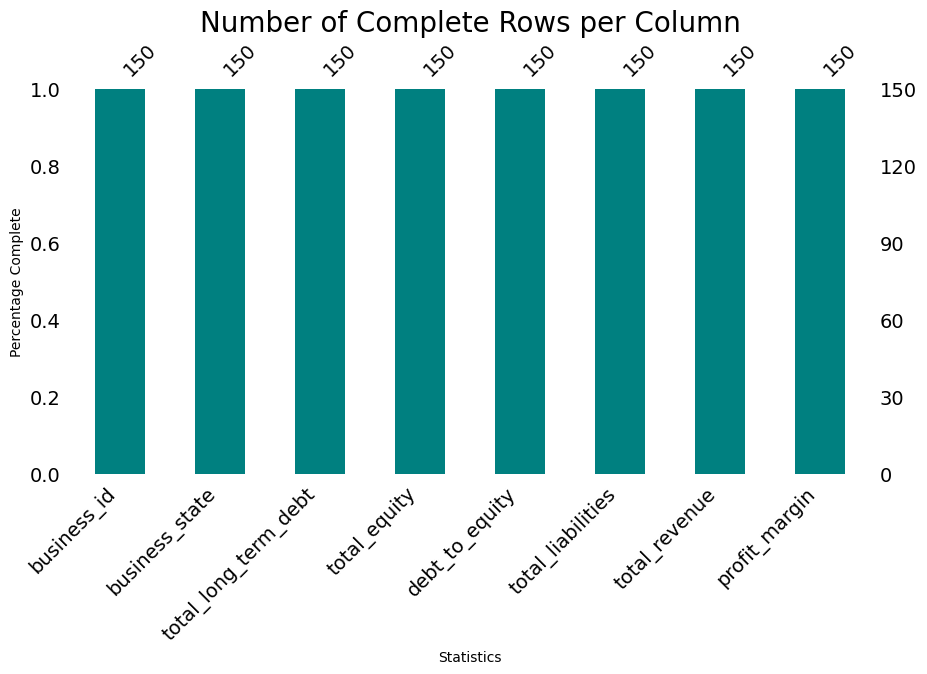

In [11]:
#removes duplicates
df.drop_duplicates()

#plots percentage of complete data in the 150 rows of our data set
fig, ax = plt.subplots(figsize=(8, 5))
msno.bar(df, ax=ax, color="teal", fontsize=14)

ax.set_xlabel("Statistics")
ax.set_ylabel("Percentage Complete")
ax.set_title("Number of Complete Rows per Column", fontsize=20)
fig.subplots_adjust(left=4, right=5)

## Descriptive Statistics

Our next blocks of code create a data frame and visualization for the descriptive statistics of our data set.

In [12]:
#assigning our aggregations to a variable
stats = ["mean", "median", "min", "max"]

#creating the data frame, grouping based on the state, and applying our aggregations across all numeric values
df_statistics = (
    df.groupby("business_state").agg({col: stats for col in df.select_dtypes(include="number").columns}))

#reformatting the columns for ease of use
df_statistics.columns = [f"{col}_{stat}" for col, stat in df_statistics.columns]

#applying a regular data set index, rather than using the state as the index
df_statistics = df_statistics.reset_index()

df_statistics.head(5)

,business_state,business_id_mean,business_id_median,business_id_min,business_id_max,total_long_term_debt_mean,total_long_term_debt_median,total_long_term_debt_min,total_long_term_debt_max,total_equity_mean,...,total_liabilities_min,total_liabilities_max,total_revenue_mean,total_revenue_median,total_revenue_min,total_revenue_max,profit_margin_mean,profit_margin_median,profit_margin_min,profit_margin_max
0,Alabama,1.599117e+09,1.599117e+09,422282013,2775952013,6.743890e+08,674389000.0,5314000.0,1.343464e+09,1.441039e+09,...,23698000.0,3.764193e+09,6.968309e+08,696830858.0,137344716,1256317000,0.403732,0.403732,0.297094,0.510371
1,Arizona,9.445082e+09,9.445082e+09,9445082013,9445082013,6.508800e+07,65088000.0,65088000.0,6.508800e+07,5.915300e+07,...,110938000.0,1.109380e+08,2.155800e+08,215580000.0,215580000,215580000,0.206902,0.206902,0.206902,0.206902
2,Arkansas,8.411162e+09,8.411162e+09,7982872013,8839452013,8.960450e+07,89604500.0,70366000.0,1.088430e+08,1.082420e+08,...,213356000.0,2.144080e+08,4.789090e+08,478909000.0,402813000,555005000,0.098319,0.098319,0.073156,0.123482
3,California,1.063053e+10,1.034300e+10,7192742013,14733342013,3.273964e+07,4721500.0,15000.0,3.349970e+08,4.535982e+07,...,2658000.0,7.888110e+08,8.869559e+07,37531500.0,1100539,276869000,0.287947,0.301992,-0.084923,0.505955
4,Colorado,9.966963e+09,1.008177e+10,3194582013,14214612013,8.470025e+07,29327000.0,3375000.0,3.753220e+08,2.007589e+08,...,6787000.0,5.822750e+08,2.486542e+08,202399000.0,7616000,696473000,0.346033,0.314631,0.124017,0.655796


Below is the visualization for the statistical analysis we performed in the previous block. Due to the volume of the data frame, I have included only Alabama's statistics for ease of viewing.

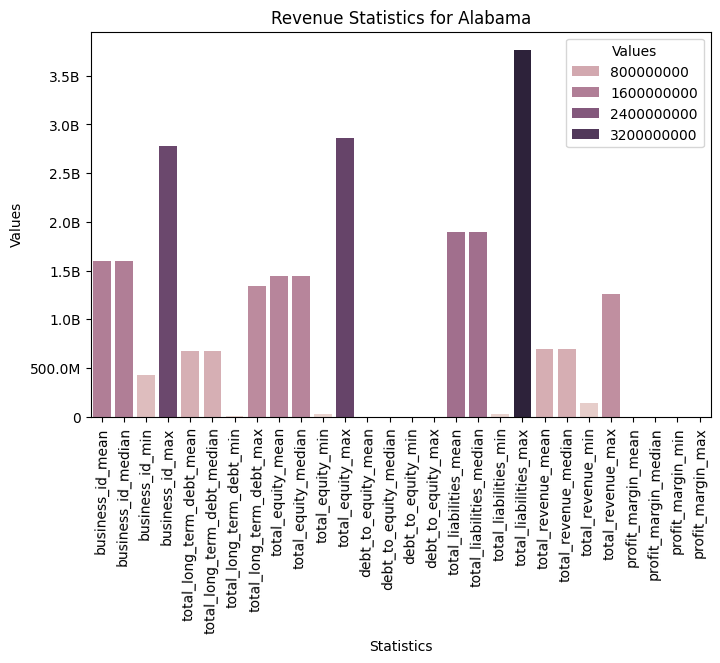

In [13]:
#adjusting the formatting of the data frame to be easier to work with in seaborn
df_melted = df_statistics.melt(
    id_vars="business_state", 
    value_vars=df_statistics.columns.drop("business_state"),
    var_name="Statistics", 
    value_name="Values"
)

#asigning this new format to it's own variable
df_alabama = df_melted[df_melted["business_state"] == "Alabama"]

#creating and formatting the chart 
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_alabama,
    x="Statistics",
    y="Values",
    hue="Values"
)
plt.title("Revenue Statistics for Alabama")
plt.xticks(rotation=89)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.show()

## Negative Debt to Equity

Below are the code blocks creating the data frame with the appropriate calculations and the visualization as well.

As you can see only 7 businesses have a negative debt to equity ratio, which is reinforced with the visualization.

In [14]:
#creates a new data frame based on businesses with a negative debt to equity ratio, returning only 7 results
df_neg_debt_equity = df[df["debt_to_equity"] < 0]
df_neg_debt_equity[["business_id", "business_state", "debt_to_equity"]]

df_neg_debt_equity.head(10)

,business_id,business_state,total_long_term_debt,total_equity,debt_to_equity,total_liabilities,total_revenue,profit_margin
18,934562013,Ohio,263880000.0,-111297000.0,-2.370953,592174000.0,719783000,0.320697
57,8343652013,Washington,10603000.0,-13271658.0,-0.798921,16625000.0,8949401,0.448119
87,9323722013,California,21560000.0,-15691000.0,-1.374036,30048000.0,37782000,0.505955
109,10919832013,Utah,2010000.0,-3602481.0,-0.557949,6302000.0,17757388,0.732562
117,11245242013,California,556000.0,-2063203.0,-0.269484,3819000.0,1100539,-0.084923
142,14535932013,Montana,16459000.0,-3842372.0,-4.283552,32720000.0,33073414,0.582444
143,14639722013,New York,187000.0,-13037879.0,-0.014343,15900000.0,2389053,0.300978


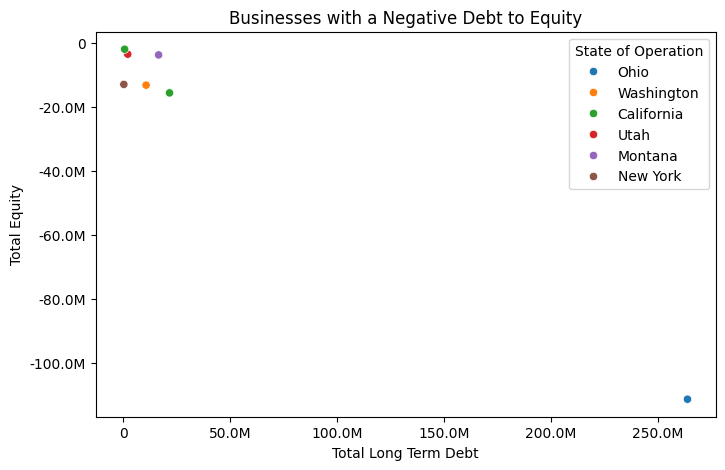

In [68]:
#Creates our scatter plot with each business based on their debt and equity
plt.figure(figsize=(8, 5))
sns.scatterplot(x="total_long_term_debt", y="total_equity", hue="business_state", data=df_neg_debt_equity)

#formats plot for improved readability
plt.ylabel("Total Equity")
plt.xlabel("Total Long Term Debt")
plt.title("Businesses with a Negative Debt to Equity")
plt.legend(title="State of Operation")
ax = plt.gca()
for axes in [ax.yaxis, ax.xaxis]:
    axes.set_major_formatter(ticker.FuncFormatter(human_format))
plt.show()

## Debt to Income

The next code blocks complete our analysis, creating a final data frame and visualization for calculating the debt to income ratio for each business.

In the below code block, the data frame "df_debt_income" holds the debt to income values for all businesses. The visualization attached shows the top 10 states containing the companies with the highest debt to income ratios.

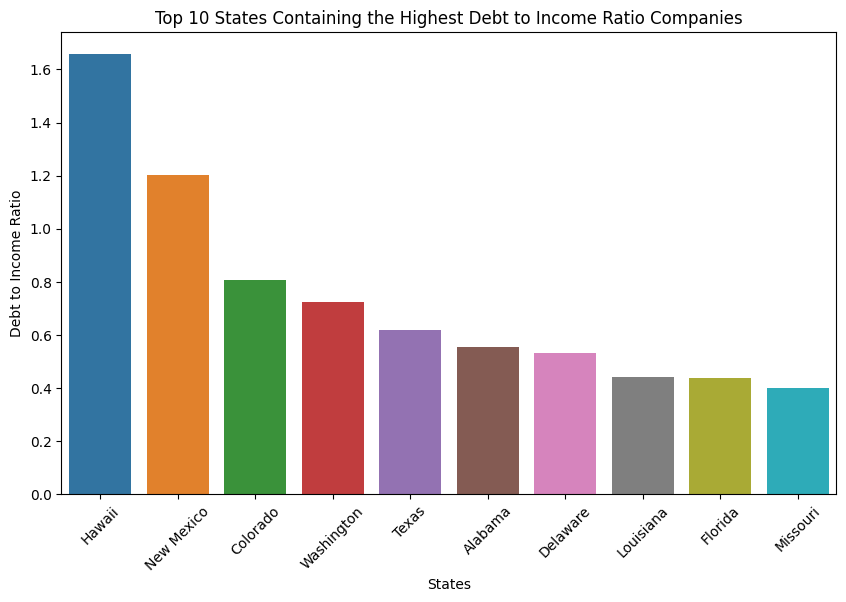

In [ ]:
#creates a new data frame and performs the calculation to find the debt to income ratio for each business
df_debt_income = pd.DataFrame({
    "business_id": df["business_id"],
    "debt_to_income": safe_divide(df["total_long_term_debt"], df["total_revenue"]),
    "business_state": df["business_state"]
    })

#filters our data frame to include the desired values for our plotting
state_dti = df_debt_income.groupby("business_state")["debt_to_income"].mean().reset_index()
top10=state_dti.nlargest(10, "debt_to_income")



#creates the visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10, 
    x="business_state", 
    y="debt_to_income",
    order=top10.sort_values("debt_to_income", ascending=False)["business_state"],
    hue="business_state"
    )

#formats the chart
plt.ylabel("Debt to Income Ratio")
plt.xlabel("States")
plt.title("Top 10 States Containing the Highest Debt to Income Ratio Companies")
plt.xticks(rotation=45)
plt.show()

This last code block combines our calculated debt to income ratio with our original data frame.

In [ ]:
df_combined = pd.concat([df, df_debt_income["debt_to_income"]], axis=1)

df_combined.head(5)

,business_id,business_state,total_long_term_debt,total_equity,debt_to_equity,total_liabilities,total_revenue,profit_margin,debt_to_income
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663,0.123500
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015,0.182665
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413,0.049974
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768,0.264664
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305,0.036268
